In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import tf_keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [3]:
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url, cache_dir='.',untar=True)+'/flower_photos'

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3141434519_aaa64c4f65_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5731750490_ba3325b7ee_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/14221192676_eb8c89a7d6_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/8723767157_c45bfd3ab6.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3422228549_f147d6e642.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4804011140_7defedf4b7_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15602874619_03fd934bed.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15509799653_0562d4a4fa.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/16476788181_0e2ffc719a.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5376

In [6]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses = list(data_dir.glob('roses/*'))

In [8]:
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3141434519_aaa64c4f65_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5731750490_ba3325b7ee_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/14221192676_eb8c89a7d6_n.jpg')]

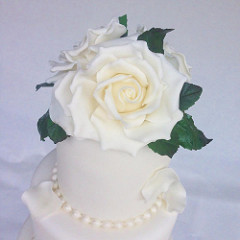

In [9]:
PIL.Image.open(str(roses[1]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses':0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(254, 320, 3)

In [13]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [14]:
X, y =[], []
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    if img is not None:
      resized = cv2.resize(img,(180,180))
      X.append(resized)
      y.append(flowers_labels_dict[flower_name])

In [15]:
X = np.array(X)
y = np.array(y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [17]:
X.shape

(3670, 180, 180, 3)

In [18]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [19]:
num_classes = 5
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    #before applying Dense layers, we gotta flatten
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes),
])

model.compile(optimizer='adam',
              loss=tf_keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [21]:
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9169 - loss: 0.2554
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9686 - loss: 0.1252
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9828 - loss: 0.0719
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9869 - loss: 0.0472
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9956 - loss: 0.0204
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9870 - loss: 0.0571
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9979 - loss: 0.0143
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9994 - loss: 0.0075
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9997 - loss: 0.0023
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9996 - loss: 0.0021
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9995 - loss: 0.0027
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy:

In [22]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6699 - loss: 2.2657


[2.255784034729004, 0.6742919683456421]

In [23]:
predictions = model.predict(X_test_scaled)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [24]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.3203831e-07, 2.5294082e-07, 9.9998844e-01, 2.6693604e-06,
       8.5420588e-06], dtype=float32)>

In [25]:
np.argmax(score)

np.int64(2)

In [26]:
y_test[0]

np.int64(0)

# **Data Augmentation** <br>
To address overfitting

In [38]:
from tensorflow.keras.layers import RandomZoom
from tensorflow.keras.layers import RandomRotation
from tensorflow.keras.layers import RandomFlip

In [40]:
data_augmentation = Sequential([
    RandomZoom(0.3),
    RandomFlip('horizontal',input_shape=(180, 180, 3)),
    RandomRotation(0.1),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


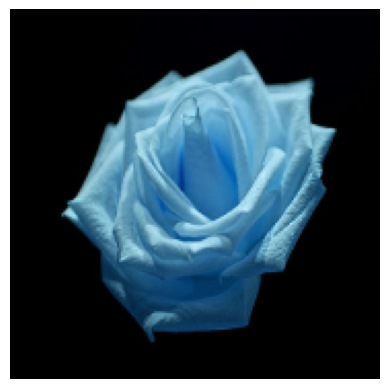

In [33]:
plt.axis('off')
plt.imshow(X[0])

In [35]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 4.],
        [0., 0., 4.],
        [0., 0., 4.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 4.],
        [0., 0., 4.],
        [0., 0., 4.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 4.],
        [0., 0., 4.],
        [0., 0., 4.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

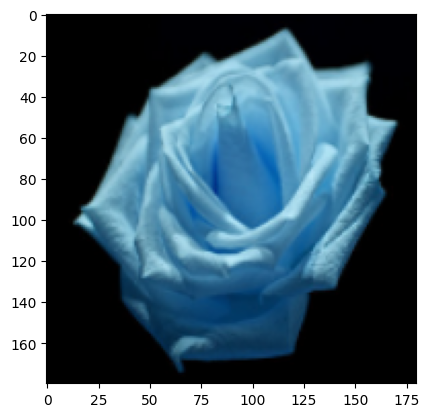

In [37]:
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [41]:
num_classes = 5
model2 = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    #before applying Dense layers, we gotta flatten
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes),
])

model2.compile(optimizer='adam',
              loss=tf_keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [42]:
model2.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.3669 - loss: 1.4865
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5862 - loss: 1.0536
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6323 - loss: 0.9676
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6576 - loss: 0.8821
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6955 - loss: 0.8130
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6920 - loss: 0.8025
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7071 - loss: 0.7570
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7373 - loss: 0.7122
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7223 - loss: 0.7111
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7378 - loss: 0.6890
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7470 - loss: 0.6557
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy:

In [44]:
model2.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7951 - loss: 0.6527


[0.6655893921852112, 0.7766884565353394]